In [4]:
!pip install opencv-python
!pip install matplotlib


  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pillow-11.3.0-cp313-cp313-win_amd64.whl.metadata (9.2 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   --- ------------------------------------ 0.8/8.1 MB 5.5 MB/s eta 0:00:02
   ----------- ---------------------------- 2.4/8.1 MB 6.1 MB/s eta 0:00:01
   --------------------- ------------------ 4.5/8.1 MB 7.6 MB/s eta 0:00:01
   ---------------------------------- ----- 7.1/8.1 MB 8.8 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 8.9 MB/s  0:00:00
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ---------------------------------------- 2.3/2.3 MB 11.0 MB/s  0:00:00
Using cached pillow-11.3.0-cp313-cp313-win_amd64.whl (7.0 MB)
Using cached pyparsing-3.2.3-py3-none-any.whl (111 kB)

   ----- ----------------------------

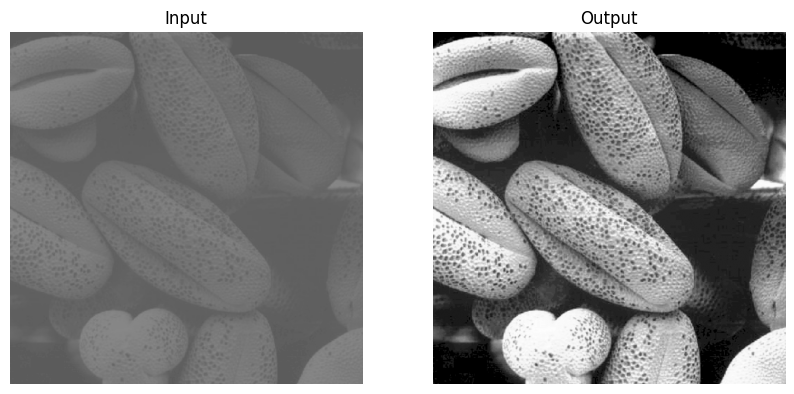

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def piecewise_linear_transform(img, r1, s1, r2, s2):
    L = 256
    lut = np.zeros(256, dtype=np.uint8)
    for r in range(256):
        if 0 <= r <= r1:
            lut[r] = (s1 / r1) * r
        elif r1 < r <= r2:
            lut[r] = ((s2 - s1) / (r2 - r1)) * (r - r1) + s1
        else:
            lut[r] = ((L - 1 - s2) / (L - 1 - r2)) * (r - r2) + s2
    return cv2.LUT(img, lut)

path = r"C:\Users\Admin\Desktop\PTIT\Y4_T1\XLA\ThuVienAnhMau\DIP3E_Original_Images_CH03\Fig0310(b)(washed_out_pollen_image).tif"
img_color = cv2.imread(path, cv2.IMREAD_COLOR)
img_color = cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB)

img_gray = cv2.cvtColor(img_color, cv2.COLOR_RGB2GRAY)

output = piecewise_linear_transform(img_gray, r1=64, s1=32, r2=128, s2=192)

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.title("Input")
plt.imshow(img_color)
plt.axis("off")

plt.subplot(1,2,2)
plt.title("Output")
plt.imshow(output, cmap="gray")
plt.axis("off")

plt.show()